Dependencies | Version
--- | ---
SatPy | 0.20.1
Pyresample | 1.12.3
Trollimage | 1.11.0
Pykdtree | 1.3.1
Pydecorate | 0.2.1


# NWCSAF/Geo

## Download data for this tutorial

Below we will use two datasets, the first one being the testdata set available at the NWCSAF Help desk (www.nwcsaf.org).

So, go download and unpack the data:
<pre>
  1.  wget http://www.nwcsaf.org/Downloads/GEO/2018/Software/NWC-CDOP3-GEO-AEMET-SW-DATA-MSGPS_DATASET_v2018.tgz -O /tmp/nwcsaf-geo-dataset.tgz
  2.  cd /tmp
  3.  tar xvzf nwcsaf-geo-dataset.tgz 
</pre>

The second dataset is available at https://zenodo.org. Here is how to download and unpack it:

<pre>
  1.  wget https://zenodo.org/record/3706415/files/hrit_msg4_0deg_202003090800.tgz -O /tmp/hrit_msg4_0deg_202003090800.tgz
  2.  cd /tmp
  3.  tar xvzf hrit_msg4_0deg_202003090800.tgz
  4.  wget https://zenodo.org/record/3706415/files/S_NWC_CT_MSG4_MSG-N-VISIR_20200309T080000Z.nc -O /tmp/S_NWC_CT_MSG4_MSG-N-VISIR_20200309T080000Z.nc
</pre>


## Read and display some product from the test dataset

Here we show how to read and visualize the TPW product.

In [3]:
from satpy import Scene
from glob import glob
from datetime import datetime

In [4]:
myfiles = (glob("/home/a000680/data/nwcsafgeo/export_archive/iSHAI/*20170112T090000Z.nc") +
           glob("/home/a000680/data/nwcsafgeo/export_archive/ASII/S_NWC_ASII-TF*20170112T090000Z.nc") +
           glob("/home/a000680/data/nwcsafgeo/export_archive/CMIC/S_NWC_CMIC*20170112T090000Z.nc"))

scene = Scene(filenames=myfiles, reader='nwcsaf-geo')
print(scene.available_composite_names())

['asii_prob', 'cloud_drop_effective_radius', 'cloud_ice_water_path', 'cloud_liquid_water_path', 'cloud_optical_thickness', 'cloud_top_phase', 'lifted_index', 'showalter_index', 'static_day', 'total_precipitable_water']


In [5]:
scene.load(['total_precipitable_water', 'showalter_index', 'lifted_index',
            'asii_prob', 'cloud_liquid_water_path', 'cloud_top_phase'])

/home/a000680/usr/src/forks/pyresample/pyresample/utils/__init__.py:33: UserWarning: 'get_area_def' has moved, import it with 'from pyresample import get_area_def'
  warnings.warn("'get_area_def' has moved, import it with 'from pyresample import get_area_def'")
/home/a000680/miniconda3/envs/python3/lib/python3.7/site-packages/pyproj/crs/crs.py:539: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj_string = self.to_proj4()
/home/a000680/usr/src/forks/pyresample/pyresample/utils/__init__.py:33: UserWarning: 'get_area_def' has moved, import it with 'from pyresample import get_area_def'
  warnings.warn("'get_area_def' has moved, import it with 'from pyresample import get_area_def'")
/home/a000680/miniconda3/envs/python3/lib/python3.7/site-packages/pyproj/crs/crs.py:539: UserWarning: You will likely lose important pr

/home/a000680/miniconda3/envs/python3/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in less_equal
  return func(*args2)
/home/a000680/miniconda3/envs/python3/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in greater_equal
  return func(*args2)
/home/a000680/miniconda3/envs/python3/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in less_equal
  return func(*args2)
/home/a000680/miniconda3/envs/python3/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in greater_equal
  return func(*args2)
/home/a000680/miniconda3/envs/python3/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in less_equal
  return func(*args2)
/home/a000680/miniconda3/envs/python3/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in greater_equal
  return func(*args2)


Show the TPW on the MSG-N grid:

/home/a000680/miniconda3/envs/python3/lib/python3.7/site-packages/trollimage/xrimage.py:907: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, these coordinates will be transposed as well unless you specify transpose_coords=False.
  res = channels.transpose('y', 'x', 'bands')
/home/a000680/miniconda3/envs/python3/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in less_equal
  return func(*args2)
/home/a000680/miniconda3/envs/python3/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in greater_equal
  return func(*args2)


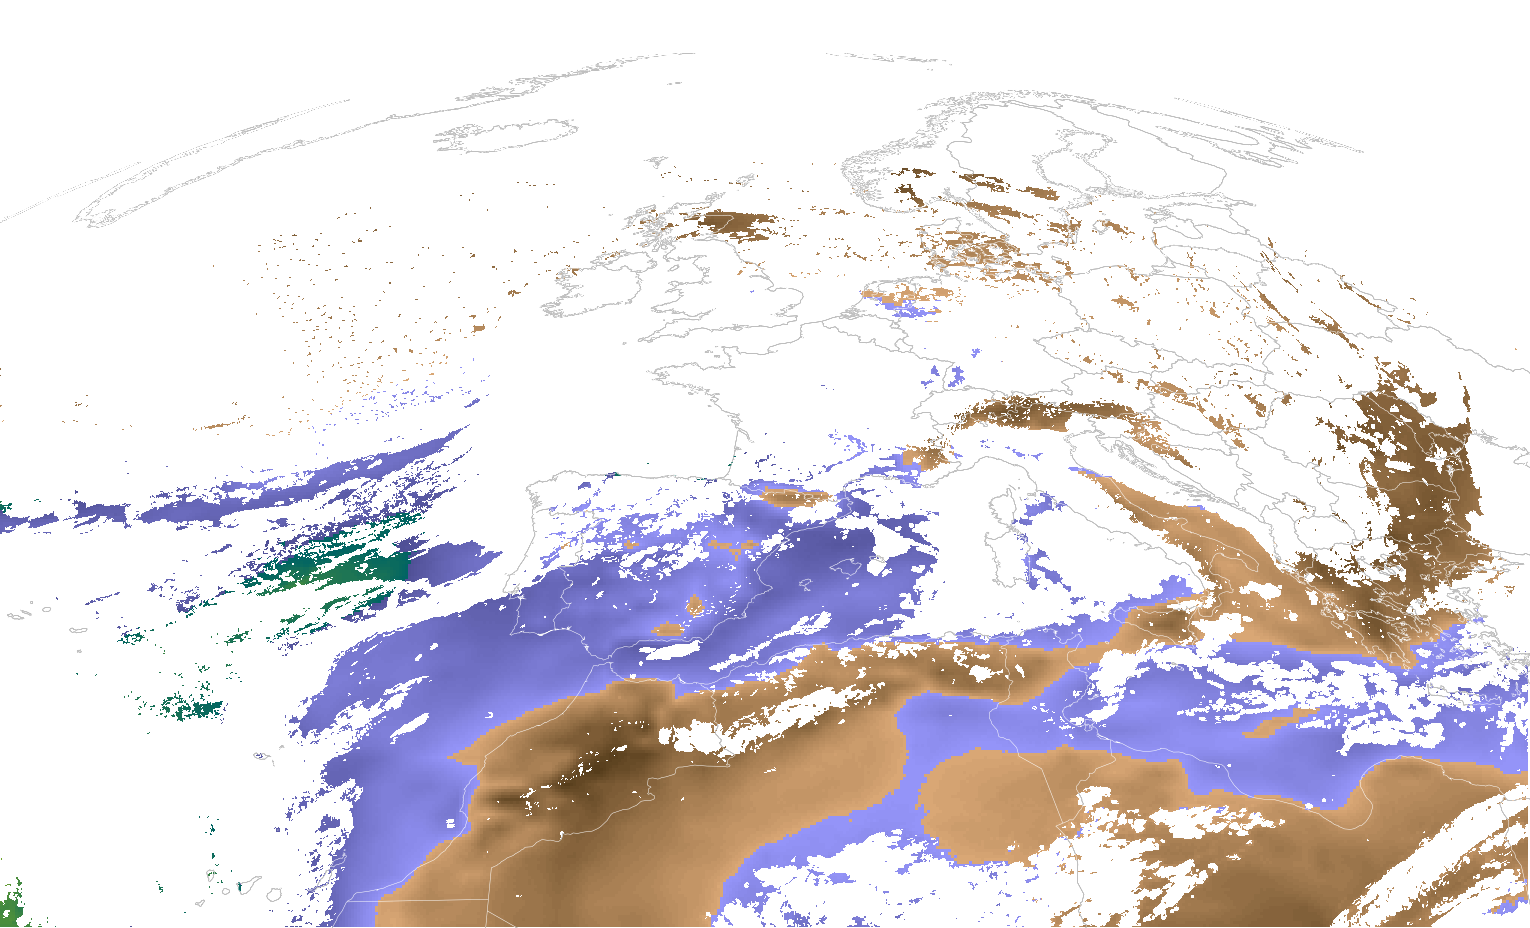

In [6]:
scene.show('total_precipitable_water',
           overlay={'coast_dir': '/home/a000680/data/shapes/', 'color': 'white'})

![Ref image](https://zenodo.org/record/3706558/files/total_precipitable_water.png)

And showing the probability for tropopause folding (ASII-TF):

/home/a000680/miniconda3/envs/python3/lib/python3.7/site-packages/trollimage/xrimage.py:907: FutureWarning: This DataArray contains multi-dimensional coordinates. In the future, these coordinates will be transposed as well unless you specify transpose_coords=False.
  res = channels.transpose('y', 'x', 'bands')


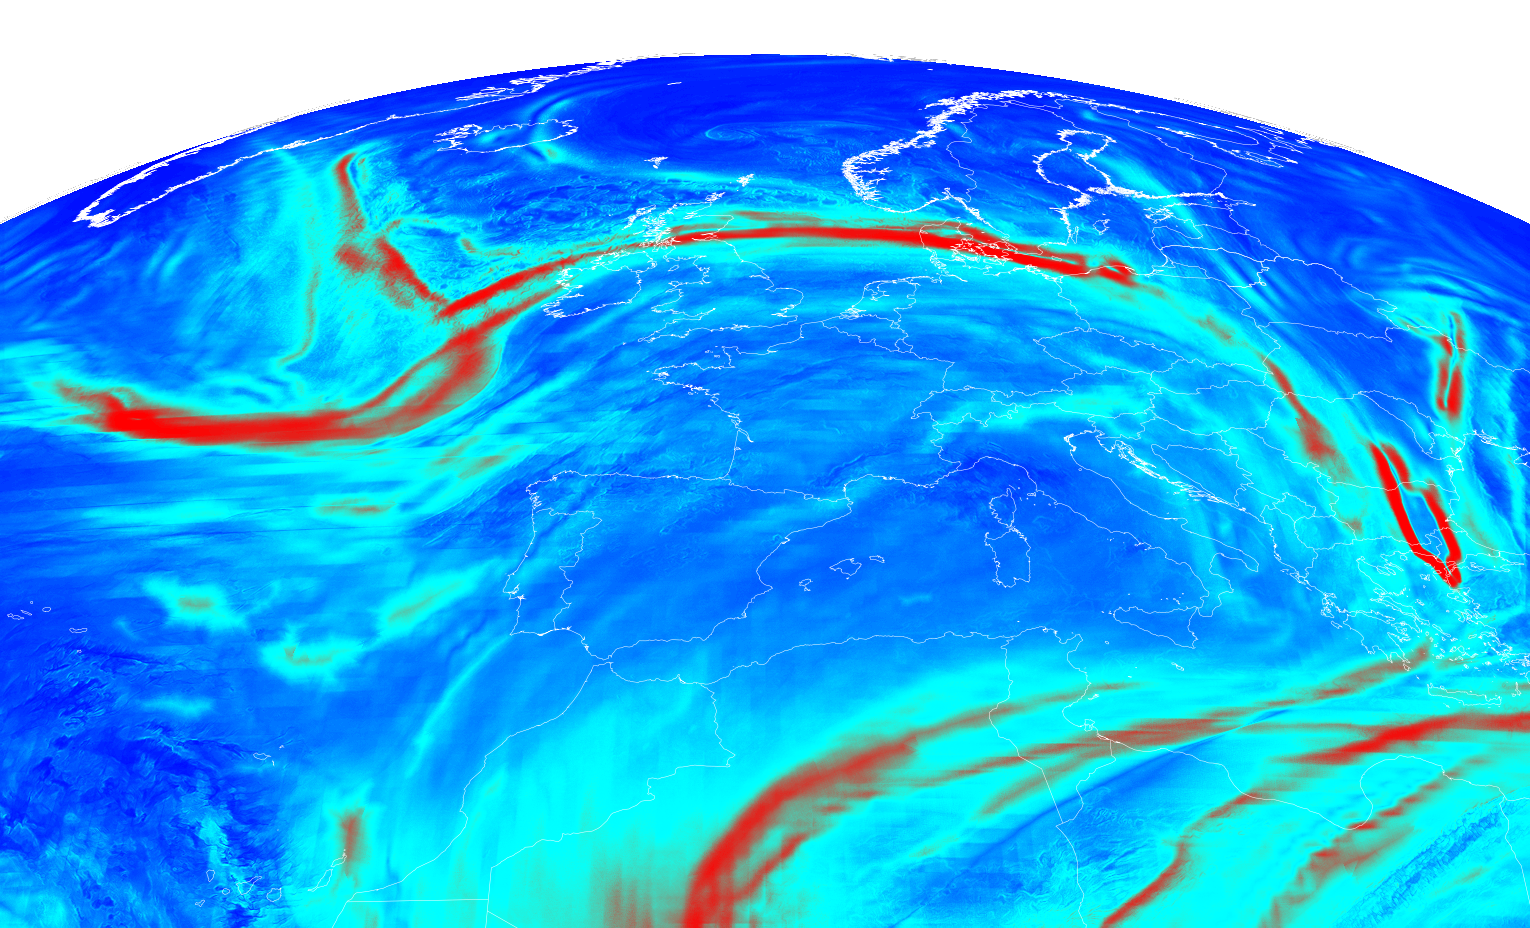

In [7]:
scene.show('asii_prob',
            overlay={'coast_dir': '/home/a000680/data/shapes/', 'color': 'white'})

![Ref image](https://zenodo.org/record/3706558/files/asii_prob.png)

## Read SEVIRI HRIT and cloud type and make some imagery

Here we show how one can read both HRIT data and NWCSAF/Geo products and use both for more advanced display.

In [8]:
import os.path
from glob import glob
from satpy import Scene
from datetime import datetime

LVL2_DIR = "/home/a000680/data/ears-nwc/0deg"
LVL1_DIR = "/home/a000680/data/ears-nwc/hrit"

LVL2_FILES = glob(os.path.join(LVL2_DIR, "*20200309T080000Z.nc"))
LVL1_FILES = glob(os.path.join(LVL1_DIR, "*202003090800-__"))

So, here we have listed two type of files we need, the hrit level-1.5 data and the corresponding NWCSAF/geo cloud products (v2016 as currently disseminated over EUMETCast). Now we create a Scene object with both:

In [9]:
scene = Scene(filenames={'nwcsaf-geo': LVL2_FILES, 'seviri_l1b_hrit': LVL1_FILES})

Now we want to make a special RGB composite using the IR band where it is cloudy according to the cloudtype product, and using a static blue marble background where it is cloudfree. Such a composite has been configured in the composite and enhancement yaml files in Satpy. We can have a look at what composites are available:

In [10]:
print(scene.available_composite_names())

['airmass', 'ash', 'cloud_top_height', 'cloud_top_pressure', 'cloud_top_temperature', 'cloudmask', 'cloudtop', 'cloudtop_daytime', 'cloudtype', 'colorized_ir_clouds', 'convection', 'ct_masked_ir', 'day_microphysics', 'day_microphysics_winter', 'dust', 'fog', 'green_snow', 'hrv_clouds', 'hrv_fog', 'ir108_3d', 'ir_cloud_day', 'ir_overview', 'ir_sandwich', 'natural_color', 'natural_color_raw', 'natural_color_with_night_ir', 'natural_color_with_night_ir_hires', 'natural_with_night_fog', 'night_fog', 'night_ir_alpha', 'night_ir_with_background', 'night_ir_with_background_hires', 'night_microphysics', 'nwc_geo_ct_masked_ir', 'nwc_geo_ct_masked_ir_inv', 'nwc_geo_ct_masked_ir_inv_with_background_day', 'overview', 'overview_raw', 'realistic_colors', 'snow', 'static_day', 'vis_sharpened_ir']


We will try the "nwc_geo_ct_masked_ir_inv_with_background_day".

In [11]:
scene.load(['nwc_geo_ct_masked_ir_inv_with_background_day'])

/home/a000680/miniconda3/envs/python3/lib/python3.7/site-packages/pyproj/crs/crs.py:539: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj_string = self.to_proj4()
/home/a000680/miniconda3/envs/python3/lib/python3.7/site-packages/pyproj/crs/crs.py:539: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj_string = self.to_proj4()
/home/a000680/miniconda3/envs/python3/lib/python3.7/site-packages/pyproj/crs/crs.py:539: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj_st

As it is using a static background image which is not on the same grid (map projection) as the data loaded we will need to reproject all data first:

In [12]:
areaid = 'euro1'
lscn = scene.resample(areaid, radius_of_influence=50000)

/home/a000680/miniconda3/envs/python3/lib/python3.7/site-packages/pyproj/crs/crs.py:539: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj_string = self.to_proj4()
/home/a000680/miniconda3/envs/python3/lib/python3.7/site-packages/pyproj/crs/crs.py:539: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj_string = self.to_proj4()
/home/a000680/miniconda3/envs/python3/lib/python3.7/site-packages/pyproj/crs/crs.py:539: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj_st

In [13]:
lscn.save_dataset('nwc_geo_ct_masked_ir_inv_with_background_day',
                  filename='./nwc_geo_ct_masked_ir_inv_with_background_day.png',
                  overlay={'coast_dir': '/home/a000680/data/shapes/', 'color': 'white'})

/home/a000680/miniconda3/envs/python3/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in cos
  return func(*args2)
/home/a000680/miniconda3/envs/python3/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sin
  return func(*args2)
/home/a000680/miniconda3/envs/python3/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in cos
  return func(*args2)
/home/a000680/miniconda3/envs/python3/lib/python3.7/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sin
  return func(*args2)


![Ref image](https://zenodo.org/record/3706415/files/nwc_geo_ct_masked_ir_inv_with_background_day.png)